In [1]:
# tutorial: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 7) # make the figure a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


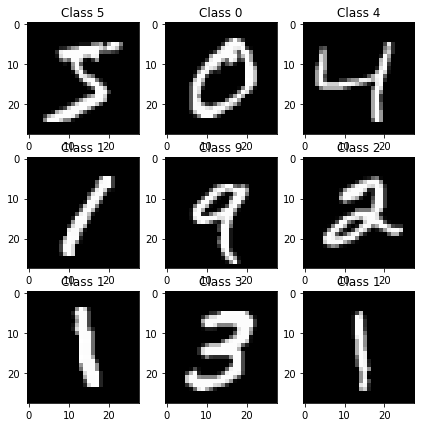

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i]))

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train,
         batch_size=128, epochs=4,
         verbose=1,
         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 35s - loss: 0.2511 - acc: 0.9239 - val_loss: 0.1097 - val_acc: 0.9659
Epoch 2/4
60000/60000 [==============================] - 26s - loss: 0.0997 - acc: 0.9697 - val_loss: 0.0827 - val_acc: 0.9732
Epoch 3/4
60000/60000 [==============================] - 24s - loss: 0.0741 - acc: 0.9766 - val_loss: 0.0791 - val_acc: 0.9768
Epoch 4/4
60000/60000 [==============================] - 21s - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0622 - val_acc: 0.9801


In [9]:
score = model.evaluate(X_test, Y_test,
                      verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0621594010904
Test accuracy: 0.9801


In [10]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9920/10000 [============================>.] - ETA: 0s

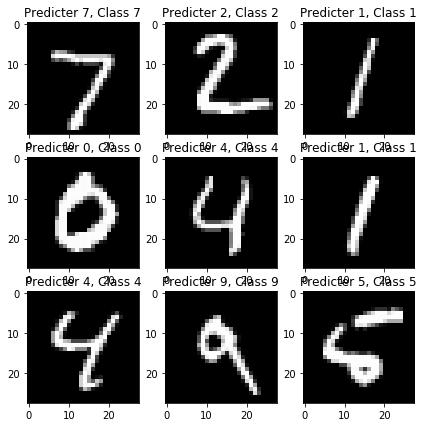

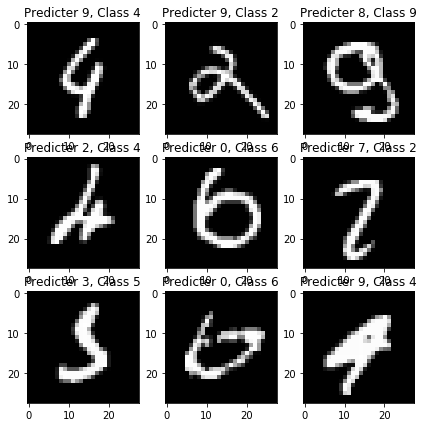

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicter {}, Class {}'.format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicter {}, Class {}'.format(predicted_classes[incorrect], y_test[incorrect]))

In [12]:
print(len(incorrect_indices))
print(len(correct_indices))

199
9801
